In [1]:
import pandas as pd
import sqlite3
from sqlite3 import Error

In [2]:
df=pd.read_csv('PBL5recommendationdata.csv',encoding ='latin-1')

/var/folders/3x/n1kkdkgn5m9c3thf3ctlb_xm0000gn/T/ipykernel_3287/3023322387.py:1: DtypeWarning: Columns (20,33,73,106,158) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('PBL5recommendationdata.csv',encoding ='latin-1')


In [3]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,...,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF04970,NaN,NaN
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF03045,NaN,NaN


Hedefler:
▪ Bu proje için ilk adım, veri setini içe aktarmak ve üç veri çerçevesi oluşturmaktır.
o Müşteri o Ürünler o Siparişler
▪ Üç veri çerçevesini bir SQLite veritabanına yerleştirin
▪ Veritabanından tabloları içe aktarın ve bunları tek bir veri çerçevesinde birleştirin
▪ Müşterileri KMeans kullanarak segmentlere ayırın ve segmentlerin özelliklerini vurgulayın
▪ Müşteri segmentlerinin sayısı gerekçelendirilmelidir.
▪ RFM tablosu oluşturun (Yenilik, Frekans ve Para)

In [4]:
df.isnull().sum()

Customers.id                0
Customers.fname             0
Customers.lname             0
Customers.company        3467
Customers.create_date       0
                         ... 
Products.leg_style       4194
Products.seat_size       4032
Products.family_id        325
Products.saved_status     264
Products.freight_cost    4194
Length: 181, dtype: int64

In [5]:
col=df.columns[df.isnull().any()]

In [6]:
col

Index(['Customers.company', 'Customers.status', 'Customers.mailing',
       'Customers.reminders', 'Customers.tax_exempt', 'Customers.account_id',
       'Customers.sales_rep', 'Customers.rewards', 'Customers.profile_id',
       'Customers.customer_type',
       ...
       'Products.google_shopping_label', 'Products.product_option',
       'Products.size', 'Products.material', 'Products.arm_style',
       'Products.leg_style', 'Products.seat_size', 'Products.family_id',
       'Products.saved_status', 'Products.freight_cost'],
      dtype='object', length=161)

In [8]:
df.fillna(method='ffill', inplace=True) #Boşluk doldurma kodu

In [9]:
df.isnull().sum()

Customers.id                0
Customers.fname             0
Customers.lname             0
Customers.company           0
Customers.create_date       0
                         ... 
Products.leg_style       4194
Products.seat_size        141
Products.family_id          0
Products.saved_status       0
Products.freight_cost    4194
Length: 181, dtype: int64

In [10]:
df.sample(10)

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,...,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
1860,1552,Rosemarie,Pagneto,Company141,1441739430,0.0,1.0,NaN,NaN,8.0,...,5.0,Mesh,2.00 OZ,Aluminum,Desk Length Removable - Swing Away Foot Rest,NaN,"20"" x 16""",PF04774,3.0,NaN
1701,1407,Larry,Schmidtbauer,Company128,1439308611,0.0,0.0,NaN,NaN,8.0,...,5.0,With End Flaps,"Size E, 3 1/2"" Wide",Elastic Tubular Bandage,Desk Length Removable - Swing Away Foot Rest,NaN,"20"" x 16""",PF05428,3.0,NaN
3283,2820,Jeannie A,Scarlett,Company320,1457969234,0.0,1.0,NaN,0.0,8.0,...,5.0,Non-Folding,"6"" x 80'",Paper,Desk Length Removable - Swing Away Foot Rest,NaN,"20"" x 17""",PF01527,3.0,NaN
2440,2048,John,Clements,Company208,1451329092,0.0,1.0,NaN,NaN,8.0,...,5.0,Non-Retail Packaging,Large,Cotton,Desk Length Removable Arms - Swing Away Foot ...,NaN,"24"" x 18""",PF10901,3.0,NaN
903,756,Debra,Bain,Company64,1424876234,0.0,1.0,NaN,NaN,8.0,...,5.0,With Backrest,9 OZ,Aluminum,Desk Length Removable - Swing Away Foot Rest,NaN,"20"" x 16""",BS4,0.0,NaN
1291,1043,Lee,Ceccotti,Company92,1431801710,0.0,1.0,NaN,NaN,8.0,...,5.0,With Back,Medium,Vinyl,Desk Length Removable - Swing Away Foot Rest,NaN,"18"" 16""",PF101930,0.0,NaN
1671,1376,Ronald,Vaughn,Company128,1438614601,0.0,1.0,NaN,NaN,8.0,...,5.0,Non-Retail Packaging,Medium,Foam-cushion plastic,Desk Length Removable - Swing Away Foot Rest,NaN,"20"" x 16""",PF21897,3.0,NaN
682,565,Christopher,Balders,Company50,1419808256,0.0,1.0,NaN,NaN,8.0,...,5.0,Detachable Full Arms,"23 x 36""",Air Permeable,Desk Length Removable - Swing Away Foot Rest,NaN,"16"" x 16""",PF05045,3.0,NaN
1853,1545,Barbara,Lindsey,Company141,1441504958,0.0,1.0,NaN,NaN,8.0,...,5.0,Mesh,"40"" x 48"" / Premium",Foam,Desk Length Removable - Swing Away Foot Rest,NaN,"20"" x 16""",PF00169,0.0,NaN
1377,1124,Linda,Moussa,Company99,1433494205,0.0,1.0,NaN,NaN,8.0,...,5.0,Auto Style Closure,118.00 ML,Polypropylene Backing,Full Length Permanent - Elevating Foot Rest,NaN,"18"" x 16""",PF06510,3.0,NaN


In [11]:
def delete_Empty_column(df):
    empty_rate=df.shape[0]*.6 
    df= pd.DataFrame([ df[col] for col in df.columns if df[col].isnull().sum()<empty_rate]).transpose()
    return df
df=delete_Empty_column(df)

In [12]:
df

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.account_id,Customers.last_modified,Customers.customer_type,...,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.seat_size,Products.family_id,Products.saved_status
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,1437764306,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,1437764354,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,0.0
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,1437764354,0.0,...,NaN,NaN,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,PF00342,0.0
3,4,James,Anderson,Company1,1386780263,NaN,NaN,NaN,1437762646,0.0,...,NaN,NaN,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,PF04970,0.0
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,1437764316,0.0,...,NaN,NaN,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,PF03045,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,3730,Nora,Fontana,Company425,1463408698,0.0,1.0,8.0,1463408698,0.0,...,3 days,https://www.drivemedical.com/bathroom-safety/1...,5.0,"spine - Large - 10"" x 24""",Medium,Plastic Rim,Swing Back Desk Length - Elevating Foot Rest,"20"" x 18""",PF06157,3.0
4190,3732,Kennithe,Tecora,Company425,1463412756,0.0,1.0,8.0,1463412756,0.0,...,3 days,https://www.drivemedical.com/bathroom-safety/1...,5.0,"spine - Large - 10"" x 24""",Medium,Plastic Rim,Swing Back Desk Length - Elevating Foot Rest,"20"" x 18""",PF08485,3.0
4191,3733,Tinna,Randall,Company425,1463413245,0.0,1.0,8.0,1463413245,0.0,...,Ships Same Day,https://www.drivemedical.com/power-mobility/sp...,5.0,21AH Batteries,Medium,Plastic Rim,Swing Back Desk Length - Elevating Foot Rest,"20"" x 18""",PM36,3.0
4192,3735,HALIMAH,SHAHID,Company425,1463416687,0.0,1.0,8.0,1463416687,0.0,...,Ships Same Day,https://www.drivemedical.com/power-mobility/sp...,5.0,21AH Batteries,Medium,Aluminum,Swing Back Desk Length - Elevating Foot Rest,"20"" x 18""",PF04829,3.0


In [14]:
pd.set_option('display.max_columns', None)

In [15]:
df.isnull().sum()

Customers.id               0
Customers.fname            0
Customers.lname            0
Customers.company          0
Customers.create_date      0
                        ... 
Products.material          2
Products.arm_style       141
Products.seat_size       141
Products.family_id         0
Products.saved_status      0
Length: 144, dtype: int64

In [20]:
dfC=[col for col in df.columns if "Customer" in col]

In [21]:
dfCustomer=df.loc[:,dfC]

In [22]:
for name in dfCustomer.columns:
    dfCustomer.rename(columns={name:name[10:]},inplace=True)
dfCustomer.rename(columns={"id":"Customer_id"},inplace=True)

#3 tane id olacak product,customer ve order için 
#süslü parantez dictionary-key verir

In [23]:
dfC

['Customers.id',
 'Customers.fname',
 'Customers.lname',
 'Customers.company',
 'Customers.create_date',
 'Customers.status',
 'Customers.mailing',
 'Customers.account_id',
 'Customers.last_modified',
 'Customers.customer_type']

In [24]:
dfCustomer=df.loc[:,dfC]

In [26]:
dfCustomer # customer ile ilgili başlıkları aldık

,Customer_id,fname,lname,company,create_date,status,mailing,account_id,last_modified,customer_type
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,1437764306,0.0
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,1437764354,0.0
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,1437764354,0.0
3,4,James,Anderson,Company1,1386780263,NaN,NaN,NaN,1437762646,0.0
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,1437764316,0.0
...,...,...,...,...,...,...,...,...,...,...
4189,3730,Nora,Fontana,Company425,1463408698,0.0,1.0,8.0,1463408698,0.0
4190,3732,Kennithe,Tecora,Company425,1463412756,0.0,1.0,8.0,1463412756,0.0
4191,3733,Tinna,Randall,Company425,1463413245,0.0,1.0,8.0,1463413245,0.0
4192,3735,HALIMAH,SHAHID,Company425,1463416687,0.0,1.0,8.0,1463416687,0.0


In [25]:
for name in dfCustomer.columns:
    dfCustomer.rename(columns={name: name[10:]},inplace=True)
dfCustomer.rename(columns={"id" : "Customer_id"}, inplace=True) 

In [27]:
dfP=[col for col in  df.columns if "Products" in col]

In [28]:
dfProducts=df.loc[:,dfP]

In [29]:
for name in dfProducts.columns:
    dfProducts.rename(columns={name: name[9:]},inplace=True)
dfProducts.rename(columns={"id" : "Product_id"}, inplace=True)  

In [30]:
dfP #products ile ilgili başlıkları aldık

['Products.id',
 'Products.status',
 'Products.template',
 'Products.vendor',
 'Products.import_id',
 'Products.name',
 'Products.display_name',
 'Products.list_price',
 'Products.price',
 'Products.sale_price',
 'Products.cost',
 'Products.flags',
 'Products.left_flag',
 'Products.last_modified',
 'Products.taxable',
 'Products.shopping_gtin',
 'Products.shopping_brand',
 'Products.shopping_mpn',
 'Products.shopping_gender',
 'Products.shopping_color',
 'Products.shopping_flags',
 'Products.amazon_asin',
 'Products.amazon_item_type',
 'Products.amazon_price',
 'Products.google_shopping_id',
 'Products.google_shopping_type',
 'Products.google_shopping_cat',
 'Products.shopping_cat',
 'Products.shopping_type',
 'Products.pricegrabber_cat',
 'Products.shopzilla_cat',
 'Products.thefind_cat',
 'Products.quickbooks_id',
 'Products.qb_edit_sequence',
 'Products.short_description',
 'Products.long_description',
 'Products.video',
 'Products.seo_title',
 'Products.seo_description',
 'Products

In [31]:
dfO=[col for col in  df.columns if "Orders" in col]

In [32]:
dfOrders=df.loc[:,dfO]

In [33]:
for name in dfOrders.columns:
    dfOrders.rename(columns={name: name[7:]},inplace=True)
dfOrders.rename(columns={"id" : "Order_id"}, inplace=True)  

In [34]:
dfOrders

,Order_id,customer_id,fname,lname,company,order_number,reorder_id,external_source,external_id,currency,subtotal,tax,shipping,coupon_id,coupon_amount,fee_name,fee_amount,discount_name,discount_amount,total,balance_due,shipping_carrier,shipping_method,tracking,payment_status,payment_date,payment_user,payment_type,payment_method,payment_amount,payment_id,payment_code,status,placed_date,updated_date,shipped_date,comments,notes,flags,partial_ship,customer_type
0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,57.2,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,5.7204E+14,3.0,1426019099.0,NaN,authorize.net,NaN,64.29,6993607863,510142,1,1426019099,1438868410.0,1426100922.0,NaN,Insured By Eye4Fraud,NaN,NaN,0.0
1,23,3,John,Smith,Company1,23,NaN,NaN,NaN,USD,20.0,0.0,9.99,13.0,2.86,NaN,NaN,NaN,NaN,29.99,NaN,fedex,11|Ground,1.28597E+14,3.0,1386090455.0,NaN,authorize.net,NaN,29.99,0,0,1,1386090455,1440528583.0,1386102621.0,NaN,Insured By Eye4Fraud,NaN,NaN,0.0
2,9531,3,John,Smith,Company1,9531,NaN,NaN,NaN,USD,68.78,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,78.73,NaN,manual,0|Standard Shipping,1.28597E+14,3.0,1449603652.0,genlee166,authorize.net,NaN,78.73,0,0,3,1449603652,1450213487.0,1386102621.0,test order,Test,NaN,NaN,0.0
3,29,4,James,Anderson,Company1,29,NaN,Ebay,NaN,USD,19.56,0.0,9.95,13.0,2.86,NaN,0.04,NaN,NaN,29.55,NaN,manual,11|Ground,7.96468E+14,3.0,1386780263.0,genlee166,authorize.net,Credit Card,29.55,0,0,1,1386780263,1440528583.0,1386800132.0,ebay order\rpaid by pay pal,Test,NaN,NaN,0.0
4,30,5,Abraham,Pollak,Company3,30,NaN,Ebay,NaN,USD,36.05,0.0,9.95,13.0,2.86,NaN,0.04,NaN,NaN,46.0,NaN,fedex,11|Ground,6.87398E+14,3.0,1386861599.0,genlee166,authorize.net,Credit Card,46.0,0,0,1,1386861599,1440528583.0,1386875623.0,ebay order\rpaid by pay pal,Test,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,17421,3730,Nora,Fontana,Company425,17421,16201.0,Ebay,3003935066.0,USD,14.85,1.21,0.0,32.0,4.8,Fee,19.99,Discount,14.7,16.06,0.0,manual,0|Standard Shipping,6.72826E+11,3.0,1463408854.0,Malka,paypal,PayPal,16.06,16706988SV3261147,372704,0,1463408854,1463410089.0,1463421842.0,Please leave package at the door. My wife is d...,phone order,1.0,0.0,0.0
4190,17425,3732,Kennithe,Tecora,Company425,17425,16201.0,Ebay,3003935066.0,USD,39.99,0.0,0.0,32.0,4.8,Fee,19.99,Discount,14.7,39.99,0.0,manual,0|Standard Shipping,6.72826E+11,1.0,1463412757.0,Berry,authorize.net,PayPal,39.99,8411514882,159938,0,1463412757,1463410089.0,1463421842.0,Please leave package at the door. My wife is d...,Phone order,1.0,0.0,0.0
4191,17426,3733,Tinna,Randall,Company425,17426,16201.0,Ebay,3003935066.0,USD,1099.0,0.0,0.0,32.0,109.9,Fee,19.99,Discount,14.7,989.1,0.0,manual,0|Standard Shipping,6.72826E+11,1.0,1463413246.0,Berry,authorize.net,PayPal,989.1,8411549709,01466D,5,1463413246,1463420213.0,1463421842.0,Please leave package at the door. My wife is d...,Phone Order,1.0,0.0,0.0
4192,17431,3735,HALIMAH,SHAHID,Company425,17431,16201.0,Ebay,3003935066.0,USD,129.99,0.0,0.0,32.0,109.9,Fee,19.99,Discount,14.7,129.99,0.0,manual,0|Standard Shipping,6.72826E+11,3.0,1463416694.0,Berry,paypal,PayPal,129.99,5MR65047290164601,01466D,0,1463416694,1463420213.0,1463421842.0,Please leave package at the door. My wife is d...,Phone Order,1.0,0.0,0.0


In [35]:
conn=sqlite3.connect("customer_seg.db")
dfCustomer.to_sql("Customers",con=conn)
dfProducts.to_sql("Products",con=conn)
dfOrders.to_sql("Orders",con=conn)

4194

In [36]:
conn.execute("SELECT * FROM Customers").fetchall()

[(0,
  797,
  'Christy',
  'Dill',
  'Company0',
  1426018724,
  None,
  None,
  None,
  1437764306,
  0.0),
 (1,
  3,
  'John',
  'Smith',
  'Company1',
  1386089139,
  None,
  None,
  None,
  1437764354,
  0.0),
 (2,
  3,
  'John',
  'Smith',
  'Company1',
  1386089139,
  None,
  None,
  None,
  1437764354,
  0.0),
 (3,
  4,
  'James',
  'Anderson',
  'Company1',
  1386780263,
  None,
  None,
  None,
  1437762646,
  0.0),
 (4,
  5,
  'Abraham',
  'Pollak',
  'Company3',
  1386861599,
  0.0,
  0.0,
  None,
  1437764316,
  0.0),
 (5,
  5,
  'Abraham',
  'Pollak',
  'Company3',
  1386861599,
  0.0,
  0.0,
  None,
  1437764316,
  0.0),
 (6,
  5,
  'Abraham',
  'Pollak',
  'Company3',
  1386861599,
  0.0,
  0.0,
  None,
  1437764316,
  0.0),
 (7,
  7,
  'peggy ',
  'thompson',
  'Company3',
  1388155947,
  0.0,
  0.0,
  None,
  1437763617,
  0.0),
 (8,
  8,
  'Randy',
  'Pruss',
  'Company3',
  1389303216,
  0.0,
  0.0,
  None,
  1437763421,
  0.0),
 (9,
  10,
  'Tommy ',
  'Smith',
  'Co

In [37]:
dfCustomer.to_sql("Customers",con=conn,if_exists='replace', index = False)
dfProducts.to_sql("Products",con=conn,if_exists='replace', index = False)
dfOrders.to_sql("Orders",con=conn,if_exists='replace', index = False)

4194

In [39]:
dfcu=pd.read_sql("Select * from Customers",con=conn)
dfpr=pd.read_sql("Select * from Products",con=conn)
dford=pd.read_sql("Select * from Orders",con=conn)

In [40]:
dfo["payment_date"]=pd.to_datetime(dford["payment_date"], unit="s")
dfo["placed_date"]=pd.to_datetime(dford["placed_date"], unit="s")
dfo["updated_date"]=pd.to_datetime(dford["updated_date"], unit="s")

In [ ]:
#conn da baglantı tanımlıyoruz,daha sonra to_sql ile üctablo olusturuyoruz,read_sql ile de o tablolardan istediğiniz query ler ile dataları çekiyoruz
#bir kere tablo olusturduktan sonra tekrar to_sql ile olan satırları calıstırmaya calısırsanız hata verecektir aynı tablo var diye 
#bir kere olusturduktan sonra markdown yapmak daha doğru olacaktık (Erdoğan Beyin katkısı)

In [41]:
import datetime as dt
today=dt.datetime(2022,10,1)

In [42]:
today

datetime.datetime(2022, 10, 1, 0, 0)

In [43]:
dfx=dford.loc[:,["customer_id","Order_id","total","placed_date"]]

In [44]:
dfx["duration"]=(today- dfx["placed_date"]).dt.days

In [45]:
dfx.columns=["customer_id","frequency", "monetary", "date", "duration"]

In [46]:
dfx

,customer_id,frequency,monetary,date,duration
0,797,3758,64.29,2015-03-10 20:24:59,2761
1,3,23,29.99,2013-12-03 17:07:35,3223
2,3,9531,78.73,2015-12-08 19:40:52,2488
3,4,29,29.55,2013-12-11 16:44:23,3215
4,5,30,46.00,2013-12-12 15:19:59,3214
...,...,...,...,...,...
4189,3730,17421,16.06,2016-05-16 14:27:34,2328
4190,3732,17425,39.99,2016-05-16 15:32:37,2328
4191,3733,17426,989.10,2016-05-16 15:40:46,2328
4192,3735,17431,129.99,2016-05-16 16:38:14,2328


In [47]:
dfx.drop("date",axis=1,inplace=True,index=None)

In [48]:
dfx.sample(5)

,customer_id,frequency,monetary,duration
2490,2102,11109,76.98,2461
3840,3394,16172,63.85,2347
2063,1730,7357,938.18,2531
3478,3014,14942,47.13,2375
1775,1478,5728,40.10,2593


In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

In [50]:
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust (clusters): 
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters = no_of_cluster)
        model=model.fit(dfx)
        pred=model.fit_predict(dfx)
        sum_of_squared_distances.append(model.inertia_)
        score = silhouette_score(dfx,pred)
        print("Number of cluster {},silhouette{}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(9)

Number of cluster 2,silhouette0.6975012710201668
Number of cluster 3,silhouette0.6053892109408825
Number of cluster 4,silhouette0.5536489660522858
Number of cluster 5,silhouette0.5562366409988215
Number of cluster 6,silhouette0.5296667366730683
Number of cluster 7,silhouette0.5199031933124366
Number of cluster 8,silhouette0.49363214068460065
Number of cluster 9,silhouette0.4829657523284775


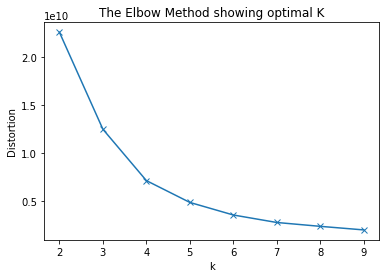

In [51]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K')
plt.show()

In [52]:
from yellowbrick.cluster import KElbowVisualizer

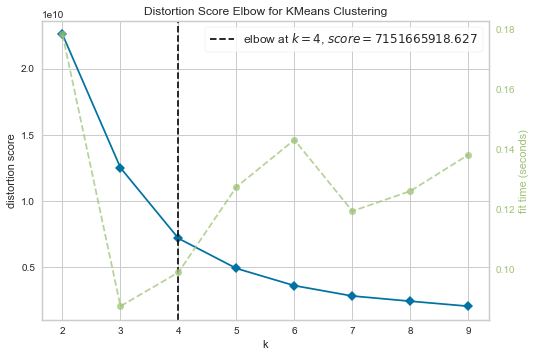

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [53]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(dfx)
visu.poof()

In [54]:
model=KMeans(n_clusters=4)

In [55]:
model=model.fit(dfx)

In [56]:
prediction=model.predict(dfx)

In [57]:
dfx["cluster"]=prediction

In [58]:
dfx.head() #RFM tablosu oluştur

,customer_id,frequency,monetary,duration,cluster
0,797,3758,64.29,2761,1
1,3,23,29.99,3223,3
2,3,9531,78.73,2488,0
3,4,29,29.55,3215,3
4,5,30,46.00,3214,3


In [59]:
silhouette_score(dfx,prediction)

0.5540470998479964

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/3x/n1kkdkgn5m9c3thf3ctlb_xm0000gn/T/ipykernel_3287/4257971437.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


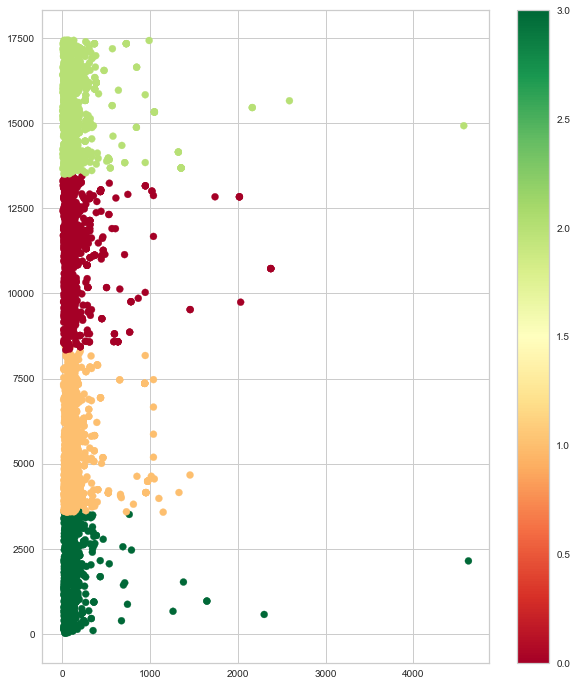

In [60]:
plt.figure(figsize=(10,12))
plt.scatter(dfx.monetary,dfx.frequency,c=prediction,cmap="RdYlGn")

plt.legend()
plt.colorbar()
plt.show()